# MACHINE LEARNING PROJECT

# Project Name: Taxi Demand Fare Prediction Using Machine Learning

# Project By- Pooja Mahendra Malusare

# Guided by- Sameer Warsolkar Sir

# Abstract

This dataset pertains to taxi demand and fare prediction, capturing a variety of attributes associated with taxi trips. 
The goal is to predict fare amounts based on features such as trip distance, payment type, and other relevant factors.

In [1]:
#importing libraries that are essential for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

In [10]:
# loading the dataset
data=pd.read_csv("Taxi Demand.csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        50000 non-null  int64  
 4   trip_distance          50000 non-null  float64
 5   pickup_longitude       50000 non-null  float64
 6   pickup_latitude        50000 non-null  float64
 7   RatecodeID             50000 non-null  int64  
 8   store_and_fwd_flag     50000 non-null  object 
 9   dropoff_longitude      50000 non-null  float64
 10  dropoff_latitude       50000 non-null  float64
 11  payment_type           50000 non-null  int64  
 12  fare_amount            50000 non-null  float64
 13  extra                  50000 non-null  float64
 14  mta_tax                50000 non-null  float64
 15  ti

In [13]:
data.duplicated().sum()  ## Check for duplicates

0

In [14]:
data.drop(['mta_tax'],axis=1)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [14]:
data.drop(['pickup_longitude'], axis=1)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [15]:
data.drop(['dropoff_longitude'], axis=1)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [16]:
data.drop(['VendorID'], axis=1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [17]:
data.drop(['store_and_fwd_flag'], axis=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [18]:
data.drop(['RatecodeID'], axis=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [19]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [20]:
data.drop("VendorID",axis = 1,inplace = True)

In [21]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,-73.984314,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,-73.967697,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,-73.973137,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,-73.992172,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [22]:
data.drop("pickup_longitude",axis = 1,inplace = True)

In [23]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,40.754944,1,N,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,40.787529,1,N,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,40.758945,1,N,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,40.750320,1,N,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [24]:
data.drop("store_and_fwd_flag",axis = 1,inplace = True)

In [25]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,40.754944,1,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,40.787529,1,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,40.758945,1,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,40.750320,1,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [26]:
data.drop("dropoff_longitude",axis = 1,inplace = True)

In [27]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_latitude,RatecodeID,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,40.765152,1,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,40.767925,1,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,40.644810,1,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,40.769814,1,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,40.792183,3,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,40.754944,1,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,40.787529,1,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,40.758945,1,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,40.750320,1,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [28]:
data.drop("pickup_latitude",axis = 1,inplace = True)

In [29]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,1,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,1,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,1,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,1,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,3,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,1,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,1,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,1,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,1,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [30]:
data.drop("dropoff_latitude",axis = 1,inplace = True)

In [31]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,1,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,1,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,1,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,3,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,1,1.02,1,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,10-03-2016 11:52,10-03-2016 12:04,1,1.71,1,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,10-03-2016 11:52,10-03-2016 12:05,1,1.28,1,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,10-03-2016 11:52,10-03-2016 12:33,1,6.52,1,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [32]:
data.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [34]:
#Summary Statistics
data.describe()

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.027620,2.676527,1.028200,1.296040,12.582057,0.00173,0.497700,1.865817,0.330857,0.299568,15.577714
std,1.656089,3.352129,0.235215,0.458873,10.385485,0.03510,0.037613,2.474038,1.453272,0.015054,13.156164
min,0.000000,0.000000,1.000000,1.000000,-7.500000,0.00000,-0.500000,-2.340000,0.000000,-0.300000,-10.140000
25%,1.000000,0.970000,1.000000,1.000000,6.500000,0.00000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,1.000000,1.570000,1.000000,1.000000,9.500000,0.00000,0.500000,1.460000,0.000000,0.300000,11.760000
75%,2.000000,2.720000,1.000000,2.000000,14.000000,0.00000,0.500000,2.460000,0.000000,0.300000,17.160000
max,6.000000,51.270000,5.000000,4.000000,314.500000,4.50000,0.500000,125.880000,25.540000,0.300000,315.300000


In [35]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01-03-2016 00:00,01-03-2016 00:07,1,2.50,1,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,1,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,01-03-2016 00:00,01-03-2016 00:00,3,10.78,1,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,01-03-2016 00:00,01-03-2016 00:00,5,30.43,3,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Data Visualization

C:\Users\Pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


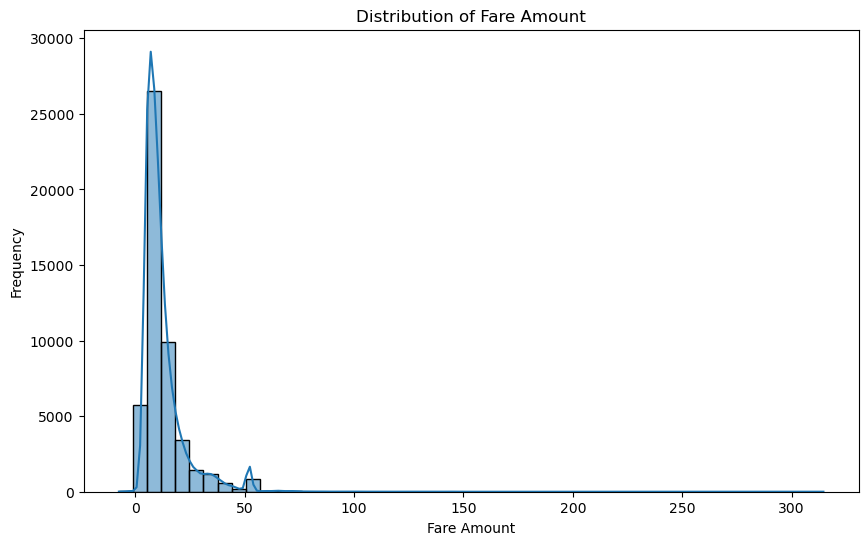

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\Pooja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


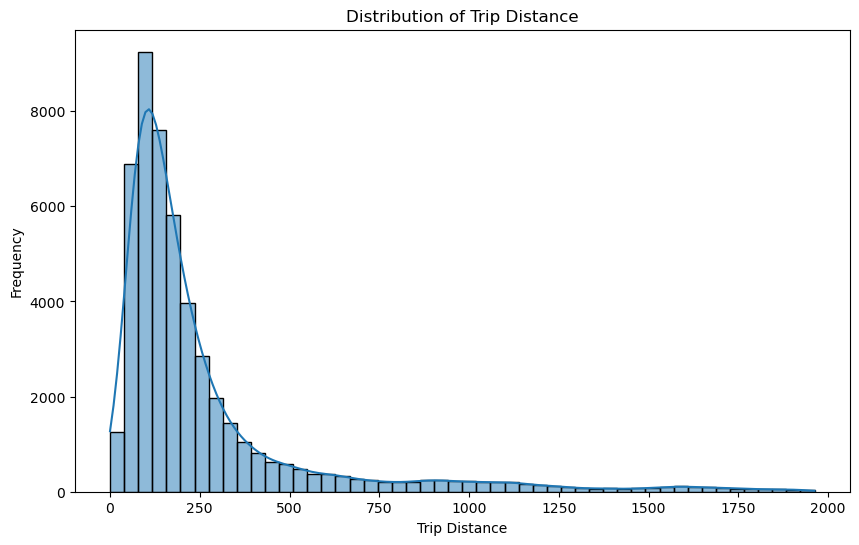

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(data['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()


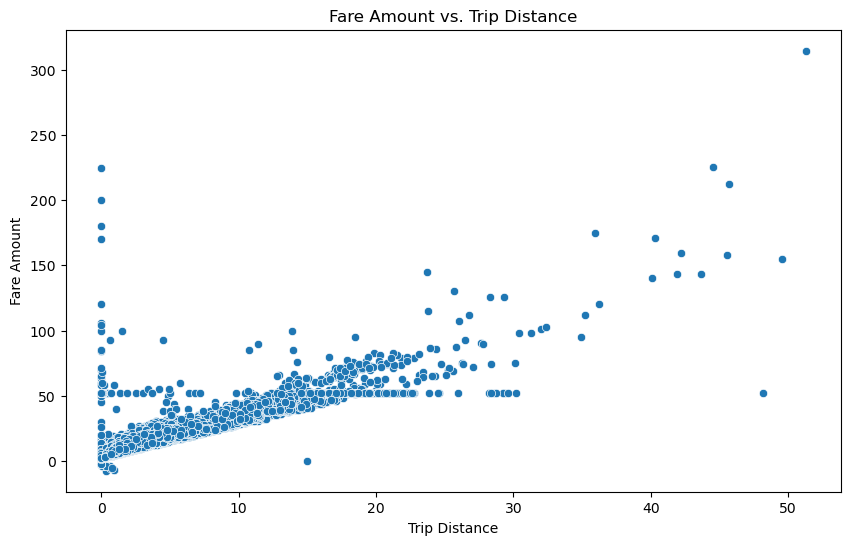

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=data)
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()


In [20]:

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [21]:
# Compute the correlation matrix on numeric columns
corr_matrix = data[numeric_columns].corr()

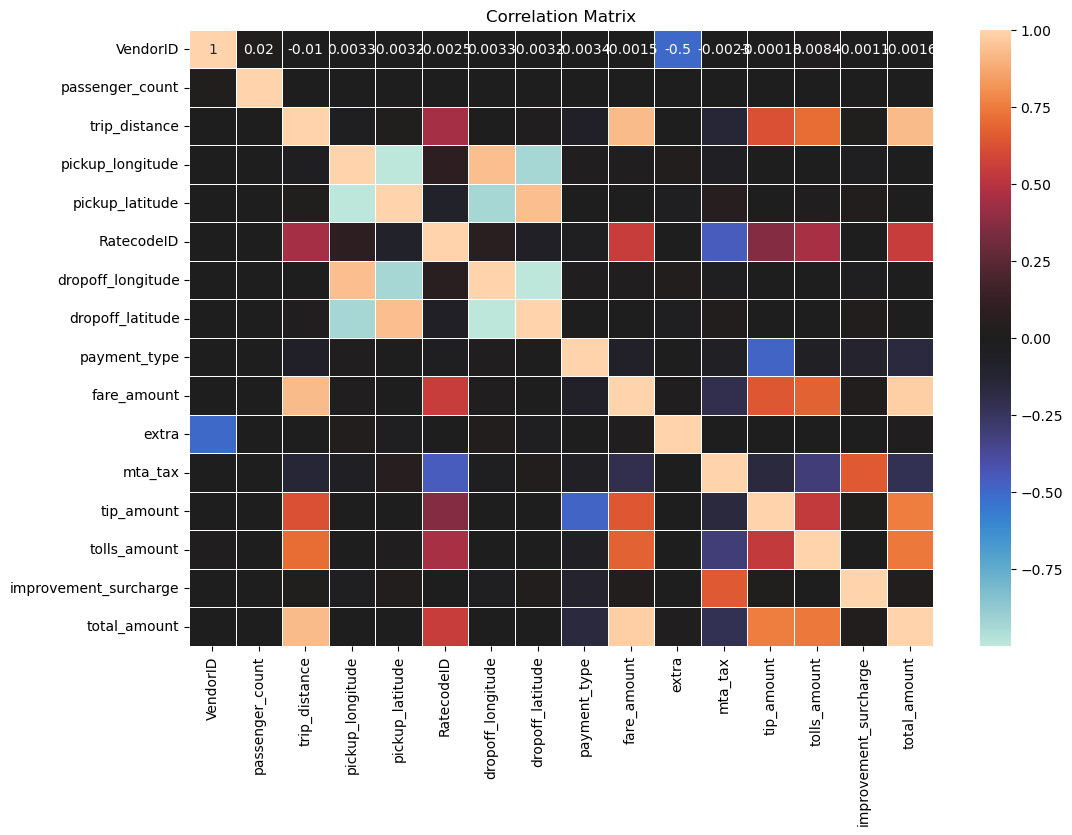

In [125]:

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='icefire', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

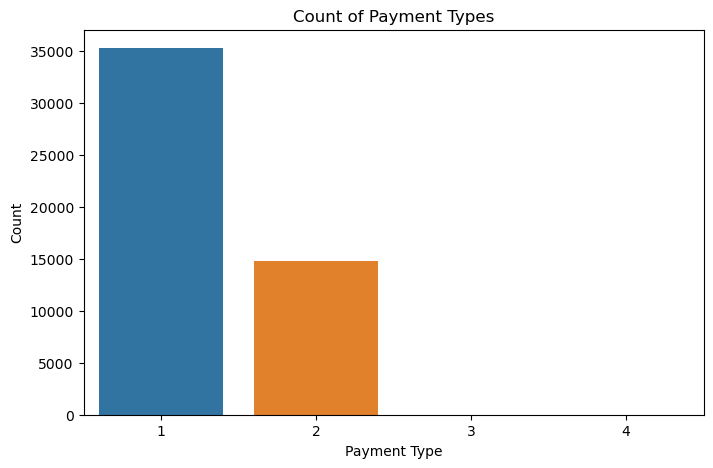

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type', data=data)
plt.title('Count of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()


## Label Encoder converting categorical data into numeric form

In [31]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [32]:
categorical_cut= data.select_dtypes(['object'])  # Identify categorical columns

In [33]:
categorical_cut

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
0,01-03-2016 00:00,01-03-2016 00:07,N
1,01-03-2016 00:00,01-03-2016 00:11,N
2,01-03-2016 00:00,01-03-2016 00:31,N
3,01-03-2016 00:00,01-03-2016 00:00,N
4,01-03-2016 00:00,01-03-2016 00:00,N
...,...,...,...
49995,10-03-2016 11:52,10-03-2016 12:01,N
49996,10-03-2016 11:52,10-03-2016 12:04,N
49997,10-03-2016 11:52,10-03-2016 12:05,N
49998,10-03-2016 11:52,10-03-2016 12:33,N


In [35]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in categorical_cut:
    categorical_cut[i] = le.fit_transform(categorical_cut[i])
    categorical_cut

In [36]:
categorical_cut

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
0,0,7,0
1,0,11,0
2,0,26,0
3,0,0,0
4,0,0,0
...,...,...,...
49995,287,327,0
49996,287,330,0
49997,287,331,0
49998,287,359,0


In [37]:
# Identify Numerical columns
Numerical_cut= data.select_dtypes(['int64',"int32","float64"])

In [38]:
Numerical_cut

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,1,2.50,-73.976746,40.765152,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,2.90,-73.983482,40.767925,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,19.98,-73.782021,40.644810,1,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,3,10.78,-73.863419,40.769814,1,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,5,30.43,-73.971741,40.792183,3,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1.02,-73.984314,40.754944,1,-73.982170,40.766483,1,7.5,0.0,0.5,1.66,0.00,0.3,9.96
49996,2,1,1.71,-73.967697,40.787529,1,-73.969933,40.768902,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30
49997,2,1,1.28,-73.973137,40.758945,1,-73.983475,40.743546,1,9.5,0.0,0.5,1.00,0.00,0.3,11.30
49998,2,1,6.52,-73.992172,40.750320,1,-73.962830,40.690151,1,28.5,0.0,0.5,0.00,0.00,0.3,29.30


In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in Numerical_cut:
    Numerical_cut[i] = le.fit_transform(Numerical_cut[i])
    Numerical_cut

In [41]:
Numerical_cut

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,250,4951,11735,0,1600,7847,0,28,1,2,149,0,2,277
1,0,1,290,4070,12350,0,1385,5317,0,32,1,2,219,0,2,368
2,1,2,1792,10642,145,0,5395,548,0,125,1,2,463,0,2,1162
3,1,3,1076,10259,12788,0,6030,10567,0,80,0,2,263,2,2,879
4,1,5,1944,5604,17001,2,85,914,0,194,0,1,2,15,2,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,102,3961,9406,0,4397,12659,0,24,0,2,117,0,2,191
49996,1,1,171,6124,16376,0,5994,13183,1,29,0,2,2,0,2,203
49997,1,1,128,5422,10334,0,4226,7308,0,29,0,2,60,0,2,237
49998,1,1,652,2938,8350,0,6884,753,0,73,0,2,2,0,2,687


In [42]:
data=pd.concat([categorical_cut,Numerical_cut],axis=1)  #pd.concat is used to concatenate DataFrames along a particular axis.
# axis=1 indicates that the concatenation should be done along the columns, meaning the DataFrames will be combined side-by-side.

In [43]:
data

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,7,0,0,1,250,4951,11735,0,1600,7847,0,28,1,2,149,0,2,277
1,0,11,0,0,1,290,4070,12350,0,1385,5317,0,32,1,2,219,0,2,368
2,0,26,0,1,2,1792,10642,145,0,5395,548,0,125,1,2,463,0,2,1162
3,0,0,0,1,3,1076,10259,12788,0,6030,10567,0,80,0,2,263,2,2,879
4,0,0,0,1,5,1944,5604,17001,2,85,914,0,194,0,1,2,15,2,1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,287,327,0,1,1,102,3961,9406,0,4397,12659,0,24,0,2,117,0,2,191
49996,287,330,0,1,1,171,6124,16376,0,5994,13183,1,29,0,2,2,0,2,203
49997,287,331,0,1,1,128,5422,10334,0,4226,7308,0,29,0,2,60,0,2,237
49998,287,359,0,1,1,652,2938,8350,0,6884,753,0,73,0,2,2,0,2,687


In [45]:
# Select the target variable
y = data['fare_amount']



In [46]:
# Drop the target variable and non-numeric or irrelevant columns to get the features
# Here we exclude columns like 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag' etc.
# as they might be non-numeric or identifiers.
X = data.drop(columns=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'])



In [47]:
# For simplicity, also dropping any remaining non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])

# Now X contains only the numeric feature columns and y is the target variable

In [49]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation


In [51]:
X_train

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
39087,1,5,226,7941,16880,0,8041,12748,0,0,2,205,0,2,337
30893,1,1,1660,10419,125,1,7190,18366,0,0,2,545,2,2,1203
45278,1,1,207,4157,5212,0,5408,11085,0,0,2,249,0,2,367
16398,1,1,169,2241,7573,0,5316,9018,0,0,2,142,0,2,257
13653,1,1,252,5168,10320,0,8283,16957,0,0,2,165,0,2,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,1,110,5150,11731,0,5589,9490,0,0,2,2,0,2,146
44732,1,1,0,9317,11635,0,11097,0,1,0,2,2,0,2,14
38158,1,1,102,5618,8381,0,4199,7419,0,0,2,85,0,2,214
860,1,1,167,3035,8252,0,5610,8664,1,0,2,2,0,2,185


In [52]:
y_train

39087     31
30893    121
45278     32
16398     28
13653     31
        ... 
11284     25
44732     12
38158     26
860       28
15795     50
Name: fare_amount, Length: 40000, dtype: int64

In [55]:
# Display the shapes of the resulting datasets
X_train.shape

(40000, 15)

In [54]:
X_test.shape

(10000, 15)

In [57]:
y_train.shape

(40000,)

In [56]:
y_test.shape

(10000,)

In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler() 
#Using StandardScaler from sklearn.preprocessing is a common step in data preprocessing to standardize features by removing the mean and scaling to unit variance. 
#This is particularly useful for machine learning algorithms that are sensitive to feature scaling.

In [61]:
X_train=sc.fit_transform(X_train) #Fit the scaler on the training data.
X_test=sc.fit_transform(X_test) # Transform both the training and test data using the fitted scaler.
X_train

array([[ 0.03744279,  1.80164309, -0.11824497, ..., -0.14846531,
         0.02785918,  0.06653029],
       [ 0.03744279, -0.61971679,  4.53392697, ...,  1.93270257,
         0.02785918,  3.41065834],
       [ 0.03744279, -0.61971679, -0.17988463, ..., -0.14846531,
         0.02785918,  0.18237768],
       ...,
       [ 0.03744279, -0.61971679, -0.52052484, ..., -0.14846531,
         0.02785918, -0.40844402],
       [ 0.03744279, -0.61971679, -0.30965233, ..., -0.14846531,
         0.02785918, -0.52042983],
       [ 0.03744279, -0.01437682,  0.51112836, ..., -0.14846531,
         0.02785918,  0.86587729]])

## Linear Regression

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
Linearregression_accuracy = r2_score(y_test, y_pred)*100

print(f'Mean Squared Error: {mse}')
print(f"R2 score: {Linearregression_accuracy:.2f}%")

Mean Squared Error: 10.42545243391357
R2 score: 98.04%


## Random forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)






RandomForestRegressor(random_state=42)

In [66]:
# Predict on the test set
y_pred = model.predict(X_test)



In [109]:
# Evaluate the model
random_forest_accuracy = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.6436
Root Mean Squared Error: 1.908821626030049
R^2 Score: 0.9931389041732476


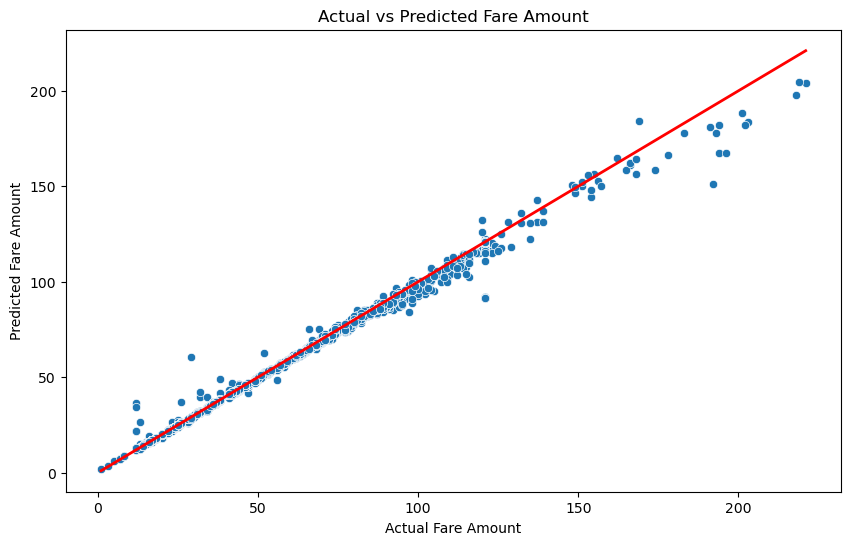

In [68]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.show()

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)




DecisionTreeRegressor(random_state=42)

In [71]:
# Predict on the test set
y_pred = model.predict(X_test)



In [110]:
# Evaluate the model
decision_tree_accuracy = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 3.6436
Root Mean Squared Error: 1.908821626030049
R^2 Score: 0.9931389041732476


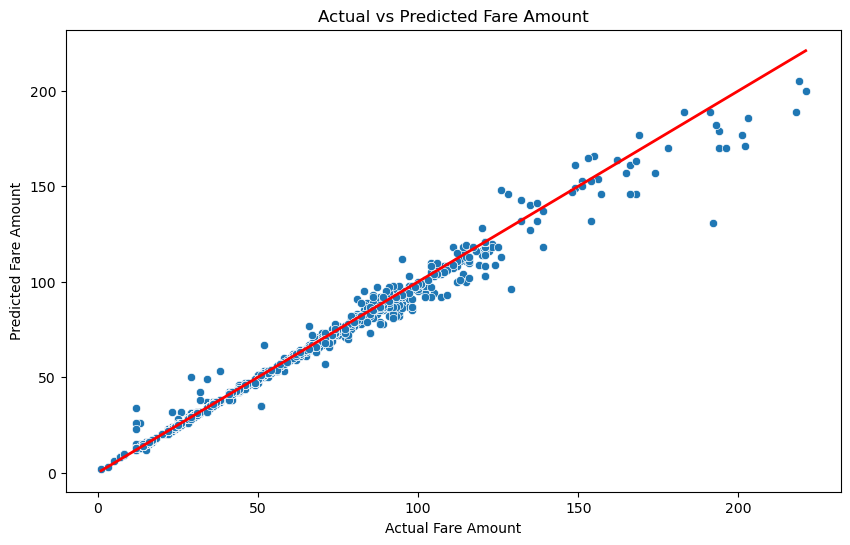

In [73]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.show()

## Hypertuning decision tree 

In [98]:
 from sklearn.model_selection import GridSearchCV


In [99]:

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson']
}


In [100]:

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid)

In [101]:
# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson']})

In [102]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [103]:
# Make predictions with the best model
y_pred_dt = best_model.predict(X_test)


In [104]:

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt) * 100
print(f'R-squared (Decision Tree with Hyperparameter Tuning): {r2_dt:.2f}%')
print(f'Best Parameters: {best_params}')

R-squared (Decision Tree with Hyperparameter Tuning): 99.45%
Best Parameters: {'criterion': 'friedman_mse'}


## KNN stand from K-Nearest Neighbors

In [105]:
# Initialize and train the model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [106]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [107]:
# Make predictions
y_pred_knn = knn.predict(X_test)

In [108]:
# Evaluate the model
knn_accuracy = r2_score(y_test, y_pred_knn)*100
print(f'R-squared (KNN): {knn_accuracy:.2f}%')

R-squared (KNN): 96.88%


 ### Create DataFrame to display accuracies 

In [111]:
from sklearn.tree import DecisionTreeRegressor


In [112]:
#from sklearn.metrics import r2_score
accuracy_df = pd.DataFrame({
    'Model': ['Linear Regression','Random forest', 'Decision Tree', 'KNN'],
    'Accuracy': [Linearregression_accuracy,random_forest_accuracy,decision_tree_accuracy, knn_accuracy]
})

accuracy_df

,Model,Accuracy
0,Linear Regression,98.036831
1,Random forest,3.643600
2,Decision Tree,3.643600
3,KNN,96.881021


###  Model Accuracy Story

Based on the provided table of model accuracies:

Linear Regression: Achieves an accuracy of 98.04%.

Random Forest and Decision Tree: Both have an accuracy of 3.64%


## Conclusion


 Best Performing Model: 
The Linear Regression model stands out with the highest accuracy of 98.04%. This indicates that it performs well in predicting
the target variable compared to the other models.

Comparison with Others:

KNN also performs well with an accuracy of 96.88%, suggesting it's a strong alternative to Linear Regression depending on the specific 
requirements and nature of the data.

Random Forest and Decision Tree models, however, show significantly lower accuracies of 3.64%,
indicating that either they are not suitable for this dataset or there might be issues such as overfitting or underfitting.
 
